In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import wikipedia

#recomendation system

its usually defined as the suggestions given to the user based upon his prior activities 

# we will import all the data sets and will see whats the primary key in both tables


In [6]:
anime_df = pd.read_csv("anime.csv")
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
rating_df = pd.read_csv("rating.csv")
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


## from above we can clearly see that anime_id is the primay key and will join the two data sets using that

In [8]:
df = pd.merge(anime_df,rating_df,on = "anime_id")
df.head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


### user ratings count plot


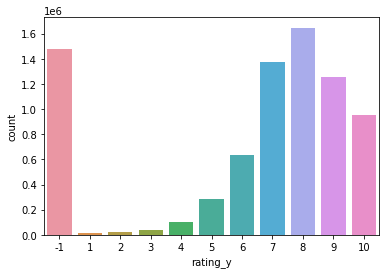

In [9]:
sns.countplot(x = "rating_y", data = df)

### as we are building collabarative filtering we will take the user ratings as the important thing so we cannot simply suugest movies that has very low rating numbers 
#### for instance movie_1 is watched by one user and gave 10 stars doesnt mean that is a good movie so in coming steps we ill preprocess the data

In [11]:
name_count = df.groupby("name")["rating_y"].count().reset_index().rename(columns={"rating_y":"total_rating_count"})
name_count.head()

,name,total_rating_count
0,&quot;0&quot;,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,782
3,&quot;Bungaku Shoujo&quot; Memoire,809
4,&quot;Bungaku Shoujo&quot; Movie,1535


### now, we will merge the datasets with the total rating count

In [12]:
df_final= pd.merge(df,name_count,on = "name")
df_final.sort_values(ascending = False, by = "total_rating_count").head()

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,total_rating_count
373833,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,55044,9,39340
348325,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,7447,-1,39340
348343,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,7483,10,39340
348342,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,7476,7,39340
348341,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917,7473,10,39340


In [13]:
df_final["total_rating_count"].describe()

count    7.813727e+06
mean     6.595941e+03
std      6.782729e+03
min      1.000000e+00
25%      1.760000e+03
50%      4.368000e+03
75%      9.191000e+03
max      3.934000e+04
Name: total_rating_count, dtype: float64

In [14]:
df_final.shape

(7813727, 10)

### from the above data we can see the spread of the data set so will take the 1760 minimum number of votes and we ill query out

In [15]:
min_votes = 1760
df_final = df_final.query("total_rating_count > @min_votes")
df_final.shape

(5858651, 10)

### we will drop some columns which are not necessary and will necessary columns

In [16]:
df_final.drop(["genre","rating_x","members"],axis =1,inplace = True)

In [17]:
df_final.head()

,anime_id,name,type,episodes,user_id,rating_y,total_rating_count
0,32281,Kimi no Na wa.,Movie,1,99,5,2199
1,32281,Kimi no Na wa.,Movie,1,152,10,2199
2,32281,Kimi no Na wa.,Movie,1,244,10,2199
3,32281,Kimi no Na wa.,Movie,1,271,10,2199
4,32281,Kimi no Na wa.,Movie,1,278,-1,2199


In [13]:
""" we will start building the reccomendation system """

' we will start building the reccomendation system '

In [18]:
movie_mat = df_final.pivot_table(index = "user_id",columns = "name",values = "rating_y").fillna(0)
movie_mat.head()

name,.hack//Roots,.hack//Sign,.hack//Tasogare no Udewa Densetsu,07-Ghost,11eyes,91 Days,A-Channel,Aa! Megami-sama!,Aa! Megami-sama! (TV),Aa! Megami-sama! Movie,Aa! Megami-sama!: Sorezore no Tsubasa,Abenobashi Mahou☆Shoutengai,Absolute Duo,Accel World,Accel World EX,Acchi Kocchi (TV),Afro Samurai,Afro Samurai: Resurrection,Ai Yori Aoshi,Ai Yori Aoshi: Enishi,Air,Air Gear,Air Gear Special,Air Gear: Kuro no Hane to Nemuri no Mori - Break on the Sky,Air Movie,Air in Summer,Aishiteruze Baby★★,Ajin,Akagami no Shirayuki-hime,Akame ga Kill!,Akaneiro ni Somaru Saka,Akatsuki no Yona,Aki-Sora,Aki-Sora: Yume no Naka,Akikan!,Akira,Aku no Hana,Akuma no Riddle,Aldnoah.Zero,Aldnoah.Zero 2nd Season,...,Working&#039;!!,X,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Yahari Ore no Seishun Love Comedy wa Machigatteiru. OVA,Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku,Yamada-kun to 7-nin no Majo (TV),Yamato Nadeshiko Shichihenge♥,Yojouhan Shinwa Taikei,"Yosuga no Sora: In Solitude, Where We Are Least Alone.",Yowamushi Pedal,Yozakura Quartet,Yumekui Merry,Yuru Yuri,Yuru Yuri♪♪,Yuusha ni Narenakatta Ore wa Shibushibu Shuushoku wo Ketsui Shimashita.,Yuu☆Yuu☆Hakusho,Yu☆Gi☆Oh!,Yu☆Gi☆Oh! Duel Monsters,Yu☆Gi☆Oh!: Duel Monsters GX,Yu☆Gi☆Oh!: Hikari no Pyramid,Zan Sayonara Zetsubou Sensei,Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima F,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zero no Tsukaima: Princesses no Rondo - Yuuwaku no Sunahama,Zetman,Zetsuen no Tempest,Zettai Karen Children: The Unlimited - Hyoubu Kyousuke,Zoku Natsume Yuujinchou,Zoku Sayonara Zetsubou Sensei,Zombie-Loan,ef: A Tale of Melodies.,ef: A Tale of Memories.,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,4.0,0.0,3.0,3.0,4.0,5.0,0.0,0.0,0.0,6.0,5.0,0.0,0.0,0.0,3.0,7.0,2.0,3.0,5.0,0.0,7.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


## to test suggestions for some movies

names of movies = ['91 Days', 'Bungou Stray Dogs', 'Mob Psycho 100', 'Orange','Koutetsujou no Kabaneri']

In [23]:
if __name__ == "__main__":
    print("please select an option")
    print("1) suggestions for the movies")
    print("2) exit")
    option = int(input("option(1/2):"))
    if option == 1:
      try:
        movie = input("enter movie name:")
        test = movie_mat[movie]
        similar_to_mve = movie_mat.corrwith(test)
        corr_mv = pd.DataFrame(similar_to_mve,columns=["corelation"])
        corr_mv.dropna(inplace = True)
        print("top 10 suggestions are...")
        x = list(corr_mv.sort_values(ascending = False,by= "corelation").index)[1:11]
        for movie in x:
          print("***********************")
          print("suggestion movie",movie)
          try:
            print("this is about...")
            print(wikipedia.summary(movie))
            print("************************")
          except:
            print("sorry.. we didnt find any reult")
      except:
        print("please enter the movie name correctly....")
    elif option == 2:
        exit()

please select an option
1) suggestions for the movies
2) exit
option(1/2):1
enter movie name:91 Days
top 10 suggestions are...
***********************
suggestion movie Bungou Stray Dogs
this is about...
Bungo Stray Dogs (Japanese: 文豪ストレイドッグス, Hepburn: Bungō Sutorei Doggusu, lit. "Literary Stray Dogs") is a Japanese seinen manga series written by Kafka Asagiri and illustrated by Sango Harukawa, which has been serialized in the magazine Young Ace since 2012. The series follows the members of the "Armed Detective Agency" throughout their everyday lives. The show mainly focuses on the weretiger Atsushi Nakajima, who joins others gifted with supernatural powers to accomplish different tasks including running a business, solving mysteries, and carrying out missions assigned by the mafia.
Multiple light novels have been published. An anime television series adaptation by Bones aired in 2016 in two parts, the first part aired between 7 April 2016 and 23 June 2016, and the second part aired bet

/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
